pip install qiskit[visualization] this is basic setup with visualization
pip install qiskit-ibm-runtime , this is for actual quantum hardware support

This is a bell state algorithm where i will be proving the quantum entanglement concept. 
qubits q1 is in superposition of 0 or 1 (using hadamard gate), if i measure one then the other one also collapses at a particular state. 
I will be putting first qubit in superposition and then apply CNOT gate with q1 as control and q2 as target

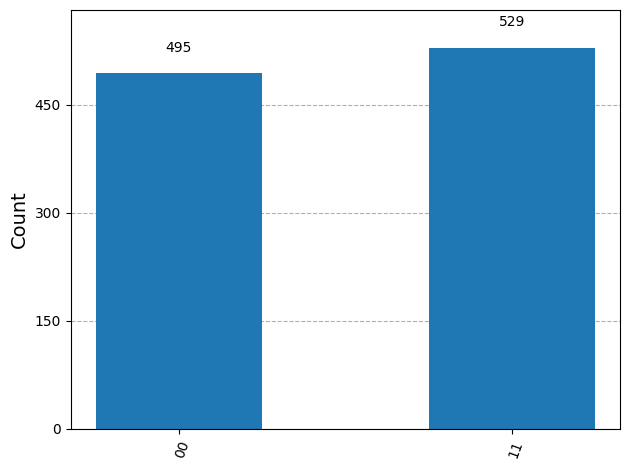

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Step 1: Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2, 2)

# Step 2: Apply Hadamard to qubit 0
qc.h(0)
# Step 3: Apply CNOT (control=0, target=1)
qc.cx(0, 1)

# Step 4: Measure both qubits
qc.measure([0, 1], [0, 1])

# Simulate and visualize results
simulator = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the backend
compiled_qc = transpile(qc, simulator)

job = simulator.run(compiled_qc, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

